In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
!ls

Adding Noise-MultipleMods.ipynb
Adding Noise.ipynb
Debugging GPU Code.ipynb
EvalCheckpoints.ipynb
EvalNoise-CNN.ipynb
EvalNoise-Clinical Transforms - CNNs.ipynb
EvalNoise-Clinical Transforms.ipynb
EvalNoise.ipynb
Other Augmentations - MultipleMods.ipynb
QuickTrainingCurve Plots.ipynb
Untitled.ipynb
run-train-tag-loss_epoch-2.csv
run-train-tag-loss_epoch-3.csv
run-train-tag-loss_epoch.csv
run-validation-tag-loss_epoch-2.csv
run-validation-tag-loss_epoch-3.csv
run-validation-tag-loss_epoch.csv


In [5]:
df1 = pd.read_csv('run-train-tag-loss_epoch.csv')
df2 = pd.read_csv('run-train-tag-loss_epoch-2.csv')
df3 = pd.read_csv('run-train-tag-loss_epoch-3.csv')
df4 = pd.read_csv('run-validation-tag-loss_epoch.csv')
df5 = pd.read_csv('run-validation-tag-loss_epoch-2.csv')
df6 = pd.read_csv('run-validation-tag-loss_epoch-3.csv')

In [6]:
df1

,Wall time,Step,Value
0,1.677237e+09,1,4042.617432
1,1.677239e+09,2,111.474991
2,1.677240e+09,3,61.071491
3,1.677242e+09,4,63.359917
4,1.677244e+09,5,64.555283
...,...,...,...
218,1.677726e+09,219,0.812400
219,1.677727e+09,220,0.774327
220,1.677729e+09,221,0.772931
221,1.677730e+09,222,0.763934


(-5.0, 50.0)

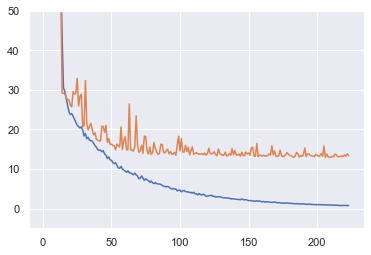

In [12]:
plt.plot(df1.Step, df1.Value)
plt.plot(df4.Step, df4.Value)
plt.ylim([-5, 50])

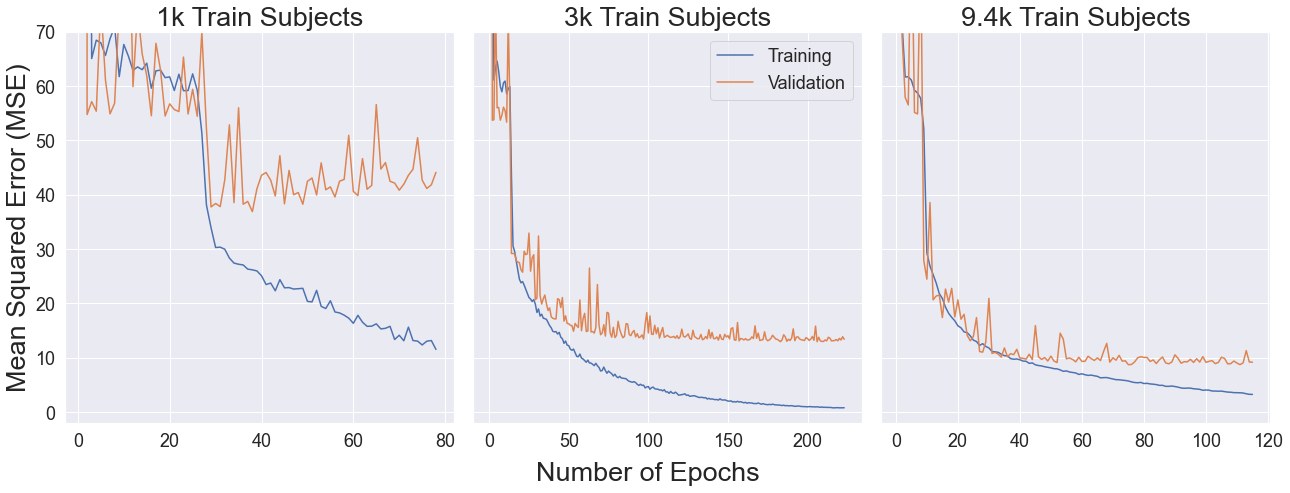

In [32]:
ncols=3
nrows=1
sz=7.2
title_font_size=22
ticks_font_size=18
legend_font = 18



fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*sz,nrows*sz))
axes = axes.ravel()

axes[0].plot(df2.Step, df2.Value)
axes[0].plot(df5.Step, df5.Value)
axes[0].set_ylim([-2, 70])
axes[0].tick_params(axis='both', labelsize=ticks_font_size)
axes[0].set_ylabel('Mean Squared Error (MSE)', fontsize=title_font_size+5)
axes[0].set_title('1k Train Subjects', fontsize=title_font_size+5)


axes[1].plot(df1.Step, df1.Value, label='Training')
axes[1].plot(df4.Step, df4.Value, label='Validation')
axes[1].set_ylim([-2, 70])
axes[1].tick_params(axis='both', labelsize=ticks_font_size)
axes[1].axes.yaxis.set_ticklabels([])
axes[1].set_title('3k Train Subjects', fontsize=title_font_size+5)
axes[1].legend(fontsize=legend_font)

axes[2].plot(df3.Step, df3.Value)
axes[2].plot(df6.Step, df6.Value)
axes[2].set_ylim([-2, 70])
axes[2].tick_params(axis='both', labelsize=ticks_font_size)
axes[2].axes.yaxis.set_ticklabels([])
axes[2].set_title('9.4k Train Subjects', fontsize=title_font_size+5)
    
# handles, labels = axes.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
# plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )
# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels)
    
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.supxlabel('Number of Epochs', y=0.05, fontsize=title_font_size+5, verticalalignment='top')
fig.savefig('PreliminarySwinTrainCurves.png', bbox_inches='tight', facecolor='white')